<a href="https://colab.research.google.com/github/Rajvardhan-singh-26/DL-codes_500108005/blob/main/partB_ass6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
# Load the Fashion-MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize images to the range [-1, 1] for the GAN
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension (grayscale)


In [ ]:
def build_generator():
    model = models.Sequential()

    # Fully connected layer
    model.add(layers.Dense(256, input_dim=100))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.BatchNormalization())

    # Reshape to a 7x7x128 feature map
    model.add(layers.Dense(7 * 7 * 128))
    model.add(layers.Reshape((7, 7, 128)))

    # Transposed convolution to upsample to 28x28x1
    model.add(layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.BatchNormalization())

    # Output layer to generate the image (1 channel, 28x28)
    model.add(layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding='same', activation='tanh'))

    return model


In [ ]:
def build_discriminator():
    model = models.Sequential()

    # Conv layers to classify the image
    model.add(layers.Conv2D(128, kernel_size=3, strides=2, input_shape=(28, 28, 1), padding='same'))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, kernel_size=3, strides=2, padding='same'))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.3))

    # Flatten and output a single scalar (real/fake)
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


In [ ]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator during GAN training

    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)

    return model


In [ ]:
def train_gan(generator, discriminator, gan, x_train, epochs=1, batch_size=128, sample_interval=50):
    # Adversarial ground truths (real images = 1, fake images = 0)
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Training loop
    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_images = x_train[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_images = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator (through the GAN, which is a combination of generator and frozen discriminator)
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, real_labels)

        # Print the progress
        print(f"{epoch}/{epochs} | D Loss: {d_loss[0]} | G Loss: {g_loss}")

        # Save generated images at intervals
        if epoch % sample_interval == 0:
            plot_real_vs_generated(real_images, generator, examples=16)


In [ ]:
def plot_real_vs_generated(real_images, generator, examples=16, dim=(4,4), figsize=(5,5)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)

    generated_images = (generated_images + 1) / 2.0  # Rescale to [0, 1]
    real_images = (real_images + 1) / 2.0  # Rescale to [0, 1]

    # Plot real images
    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            axs[i,j].imshow(real_images[cnt, :, :, 0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.suptitle("Real Images", fontsize=16)
    plt.show()

    # Plot generated images
    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            axs[i,j].imshow(generated_images[cnt, :, :, 0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.suptitle("Generated Images", fontsize=16)
    plt.show()


4/4 [==============================] - 0s 3ms/step
0/10000 | D Loss: 0.7018570601940155 | G Loss: 0.4760785400867462
1/1 [==============================] - 0s 166ms/step


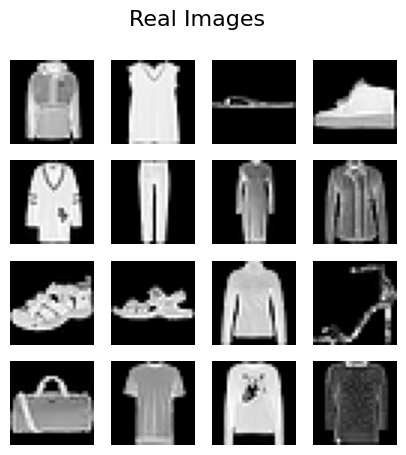

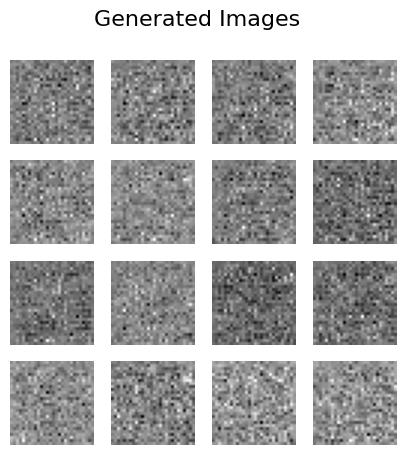

4/4 [==============================] - 0s 3ms/step
1/10000 | D Loss: 0.4904955178499222 | G Loss: 0.2727908194065094
4/4 [==============================] - 0s 3ms/step
2/10000 | D Loss: 0.40921969898045063 | G Loss: 0.1351567804813385
4/4 [==============================] - 0s 3ms/step
3/10000 | D Loss: 0.3941474389284849 | G Loss: 0.07222430408000946
4/4 [==============================] - 0s 3ms/step
4/10000 | D Loss: 0.3902360408101231 | G Loss: 0.04493711516261101
4/4 [==============================] - 0s 3ms/step
5/10000 | D Loss: 0.3826180402538739 | G Loss: 0.036862537264823914
4/4 [==============================] - 0s 4ms/step
6/10000 | D Loss: 0.36511995643377304 | G Loss: 0.03727823495864868
4/4 [==============================] - 0s 3ms/step
7/10000 | D Loss: 0.3457010837737471 | G Loss: 0.04087275639176369
4/4 [==============================] - 0s 4ms/step
8/10000 | D Loss: 0.32144833938218653 | G Loss: 0.055740393698215485
4/4 [==============================] - 0s 3ms/step
9/

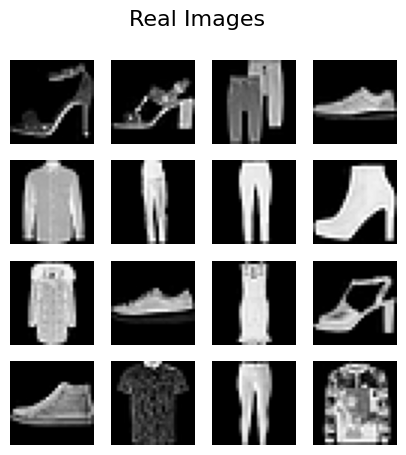

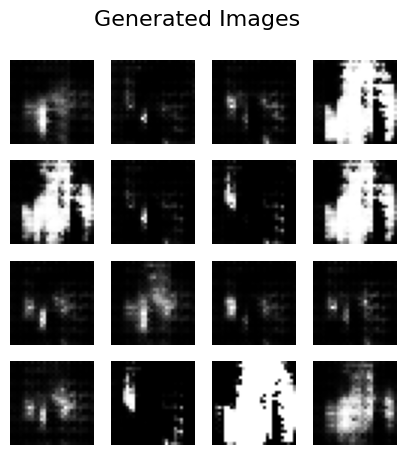

4/4 [==============================] - 0s 3ms/step
501/10000 | D Loss: 0.33151155710220337 | G Loss: 4.520391941070557
4/4 [==============================] - 0s 3ms/step
502/10000 | D Loss: 0.35305261611938477 | G Loss: 3.6984007358551025
4/4 [==============================] - 0s 5ms/step
503/10000 | D Loss: 0.2727707102894783 | G Loss: 3.4836153984069824
4/4 [==============================] - 0s 5ms/step
504/10000 | D Loss: 0.19414880871772766 | G Loss: 4.055901050567627
4/4 [==============================] - 0s 3ms/step
505/10000 | D Loss: 0.15473753213882446 | G Loss: 4.206154823303223
4/4 [==============================] - 0s 3ms/step
506/10000 | D Loss: 0.24490290880203247 | G Loss: 3.76480770111084
4/4 [==============================] - 0s 3ms/step
507/10000 | D Loss: 0.29266295582056046 | G Loss: 3.6295523643493652
4/4 [==============================] - 0s 3ms/step
508/10000 | D Loss: 0.15030107647180557 | G Loss: 3.310792922973633
4/4 [==============================] - 0s 4ms/s

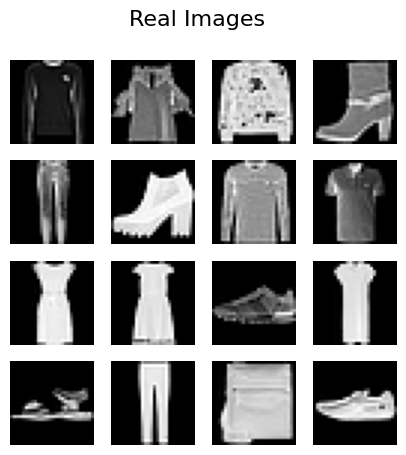

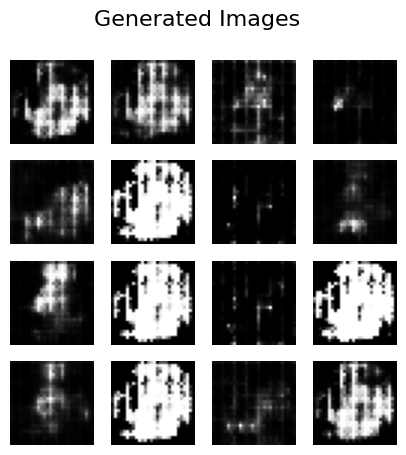

4/4 [==============================] - 0s 3ms/step
1001/10000 | D Loss: 0.08299849554896355 | G Loss: 5.1081624031066895
4/4 [==============================] - 0s 3ms/step
1002/10000 | D Loss: 0.11337810382246971 | G Loss: 5.3822455406188965
4/4 [==============================] - 0s 4ms/step
1003/10000 | D Loss: 0.18475085869431496 | G Loss: 4.942229747772217
4/4 [==============================] - 0s 3ms/step
1004/10000 | D Loss: 0.10028444975614548 | G Loss: 4.927814483642578
4/4 [==============================] - 0s 3ms/step
1005/10000 | D Loss: 0.11651727184653282 | G Loss: 4.707592964172363
4/4 [==============================] - 0s 4ms/step
1006/10000 | D Loss: 0.1133461445569992 | G Loss: 4.74736213684082
4/4 [==============================] - 0s 3ms/step
1007/10000 | D Loss: 0.13355228304862976 | G Loss: 4.6801042556762695
4/4 [==============================] - 0s 3ms/step
1008/10000 | D Loss: 0.10672157257795334 | G Loss: 4.624070167541504
4/4 [==============================] - 

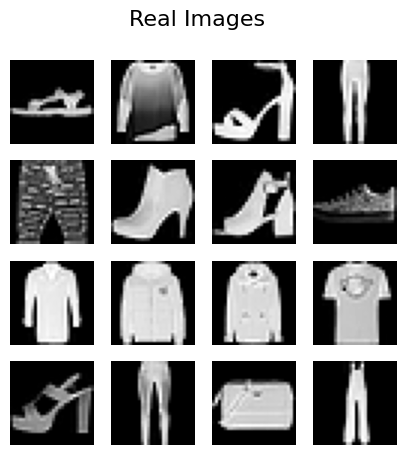

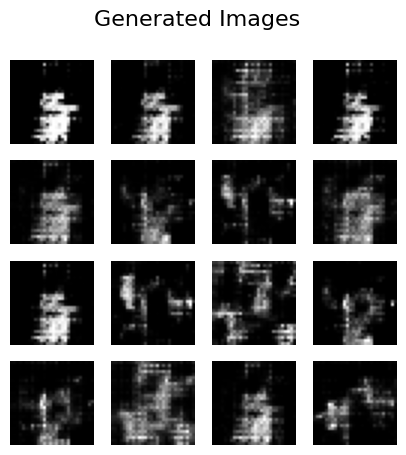

4/4 [==============================] - 0s 4ms/step
1501/10000 | D Loss: 0.12298068404197693 | G Loss: 4.20827579498291
4/4 [==============================] - 0s 6ms/step
1502/10000 | D Loss: 0.12236475944519043 | G Loss: 4.421203136444092
4/4 [==============================] - 0s 3ms/step
1503/10000 | D Loss: 0.14594917744398117 | G Loss: 4.701724052429199
4/4 [==============================] - 0s 5ms/step
1504/10000 | D Loss: 0.11976968497037888 | G Loss: 5.8917388916015625
4/4 [==============================] - 0s 4ms/step
1505/10000 | D Loss: 0.14439153485000134 | G Loss: 5.166752815246582
4/4 [==============================] - 0s 4ms/step
1506/10000 | D Loss: 0.09416849166154861 | G Loss: 4.684695243835449
4/4 [==============================] - 0s 4ms/step
1507/10000 | D Loss: 0.21421320736408234 | G Loss: 4.472808837890625
4/4 [==============================] - 0s 4ms/step
1508/10000 | D Loss: 0.20174720138311386 | G Loss: 4.60386323928833
4/4 [==============================] - 0s

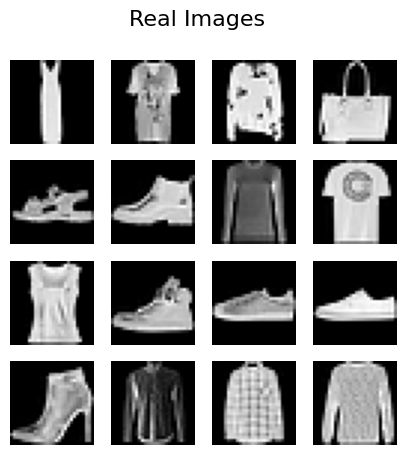

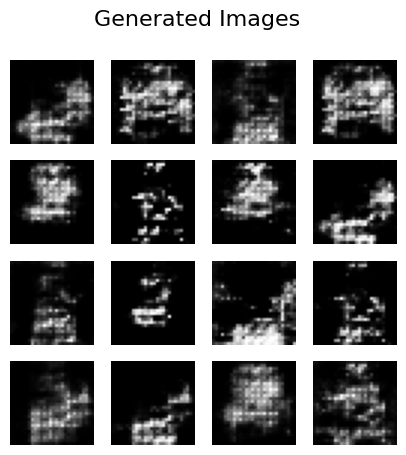

4/4 [==============================] - 0s 3ms/step
2001/10000 | D Loss: 0.1320844143629074 | G Loss: 4.913482666015625
4/4 [==============================] - 0s 3ms/step
2002/10000 | D Loss: 0.15361418202519417 | G Loss: 4.397520542144775
4/4 [==============================] - 0s 3ms/step
2003/10000 | D Loss: 0.1095304936170578 | G Loss: 5.557084083557129
4/4 [==============================] - 0s 3ms/step
2004/10000 | D Loss: 0.13002329412847757 | G Loss: 5.735685348510742
4/4 [==============================] - 0s 4ms/step
2005/10000 | D Loss: 0.11001470312476158 | G Loss: 4.68646240234375
4/4 [==============================] - 0s 9ms/step
2006/10000 | D Loss: 0.12302583083510399 | G Loss: 3.8382763862609863
4/4 [==============================] - 0s 3ms/step
2007/10000 | D Loss: 0.11410066485404968 | G Loss: 4.55764102935791
4/4 [==============================] - 0s 4ms/step
2008/10000 | D Loss: 0.09298837557435036 | G Loss: 5.387905120849609
4/4 [==============================] - 0s 5

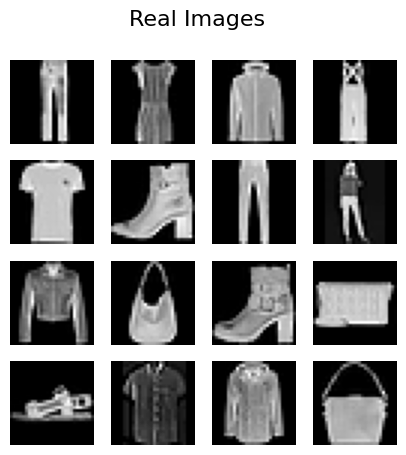

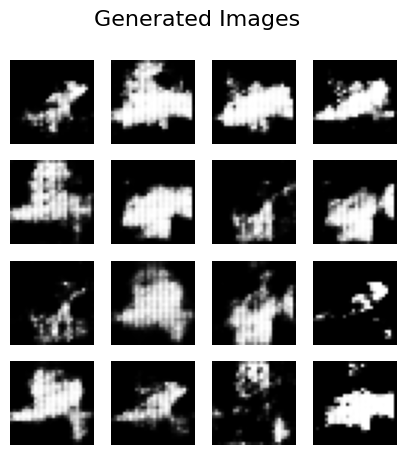

4/4 [==============================] - 0s 3ms/step
2501/10000 | D Loss: 0.13930626586079597 | G Loss: 7.25412654876709
4/4 [==============================] - 0s 3ms/step
2502/10000 | D Loss: 0.0873224027454853 | G Loss: 7.177318572998047
4/4 [==============================] - 0s 4ms/step
2503/10000 | D Loss: 0.0759279690682888 | G Loss: 8.52672004699707
4/4 [==============================] - 0s 3ms/step
2504/10000 | D Loss: 0.08517366647720337 | G Loss: 7.20620059967041
4/4 [==============================] - 0s 3ms/step
2505/10000 | D Loss: 0.12593095749616623 | G Loss: 6.876640319824219
4/4 [==============================] - 0s 3ms/step
2506/10000 | D Loss: 0.08053695037961006 | G Loss: 6.731682777404785
4/4 [==============================] - 0s 4ms/step
2507/10000 | D Loss: 0.04355557821691036 | G Loss: 7.473915100097656
4/4 [==============================] - 0s 6ms/step
2508/10000 | D Loss: 0.05093647539615631 | G Loss: 8.243904113769531
4/4 [==============================] - 0s 6ms

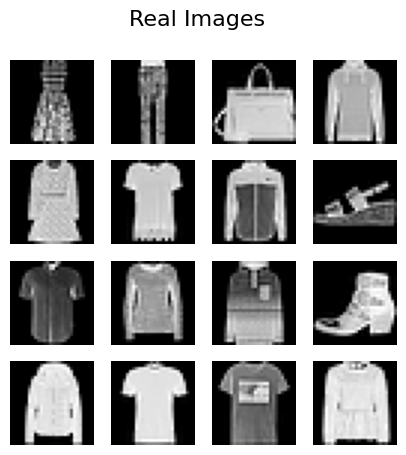

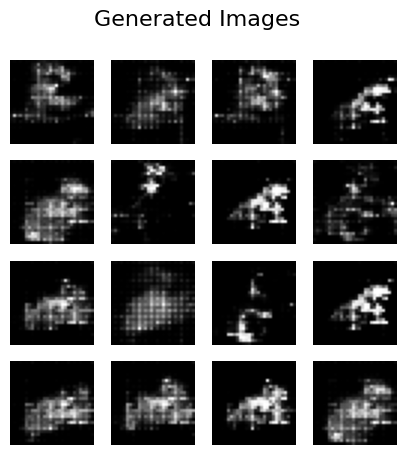

4/4 [==============================] - 0s 4ms/step
3001/10000 | D Loss: 0.014723874162882566 | G Loss: 8.632568359375
4/4 [==============================] - 0s 4ms/step
3002/10000 | D Loss: 0.016930751968175173 | G Loss: 8.052315711975098
4/4 [==============================] - 0s 3ms/step
3003/10000 | D Loss: 0.06855012569576502 | G Loss: 7.348875045776367
4/4 [==============================] - 0s 4ms/step
3004/10000 | D Loss: 0.010787103557959199 | G Loss: 7.197549343109131
4/4 [==============================] - 0s 7ms/step
3005/10000 | D Loss: 0.02766728214919567 | G Loss: 6.578059673309326
4/4 [==============================] - 0s 3ms/step
3006/10000 | D Loss: 0.03077736124396324 | G Loss: 6.419669151306152
4/4 [==============================] - 0s 3ms/step
3007/10000 | D Loss: 0.03565646009519696 | G Loss: 6.749565124511719
4/4 [==============================] - 0s 3ms/step
3008/10000 | D Loss: 0.028850863687694073 | G Loss: 7.149396896362305
4/4 [==============================] - 

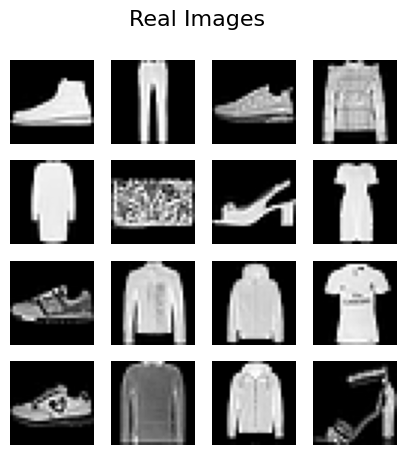

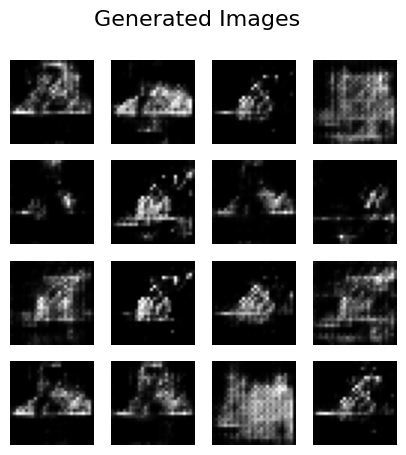

4/4 [==============================] - 0s 3ms/step
3501/10000 | D Loss: 0.025535243097692728 | G Loss: 6.363373756408691
4/4 [==============================] - 0s 3ms/step
3502/10000 | D Loss: 0.08808536268770695 | G Loss: 3.8569743633270264
4/4 [==============================] - 0s 4ms/step
3503/10000 | D Loss: 0.10839598998427391 | G Loss: 6.389747619628906
4/4 [==============================] - 0s 3ms/step
3504/10000 | D Loss: 0.031192380469292402 | G Loss: 10.354720115661621
4/4 [==============================] - 0s 3ms/step
3505/10000 | D Loss: 0.09366664115805179 | G Loss: 9.247251510620117
4/4 [==============================] - 0s 4ms/step
3506/10000 | D Loss: 0.09120394894853234 | G Loss: 6.030412673950195
4/4 [==============================] - 0s 5ms/step
3507/10000 | D Loss: 0.20206472277641296 | G Loss: 7.956029415130615
4/4 [==============================] - 0s 3ms/step
3508/10000 | D Loss: 0.0805568671785295 | G Loss: 11.685739517211914
4/4 [==============================]

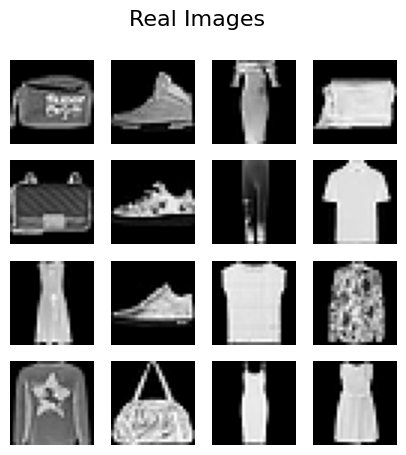

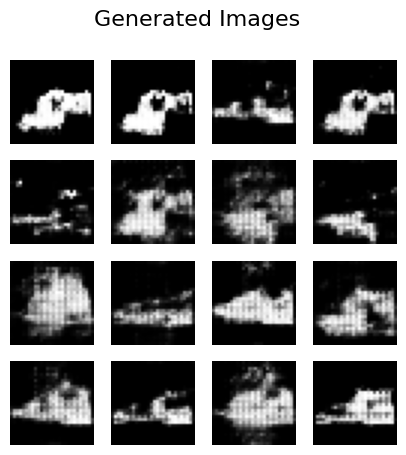

4/4 [==============================] - 0s 3ms/step
4001/10000 | D Loss: 0.044433120638132095 | G Loss: 8.794909477233887
4/4 [==============================] - 0s 3ms/step
4002/10000 | D Loss: 0.12592495046555996 | G Loss: 7.113001346588135
4/4 [==============================] - 0s 3ms/step
4003/10000 | D Loss: 0.07430196739733219 | G Loss: 6.766933441162109
4/4 [==============================] - 0s 4ms/step
4004/10000 | D Loss: 0.043513987213373184 | G Loss: 8.308333396911621
4/4 [==============================] - 0s 3ms/step
4005/10000 | D Loss: 0.03705477807670832 | G Loss: 9.170668601989746
4/4 [==============================] - 0s 3ms/step
4006/10000 | D Loss: 0.15037177316844463 | G Loss: 9.142602920532227
4/4 [==============================] - 0s 3ms/step
4007/10000 | D Loss: 0.04412061348557472 | G Loss: 7.7005133628845215
4/4 [==============================] - 0s 3ms/step
4008/10000 | D Loss: 0.06500409543514252 | G Loss: 6.9012651443481445
4/4 [==============================]

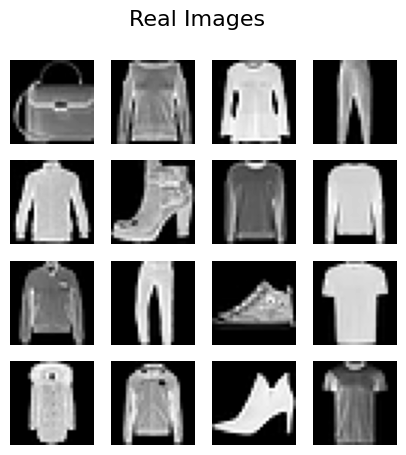

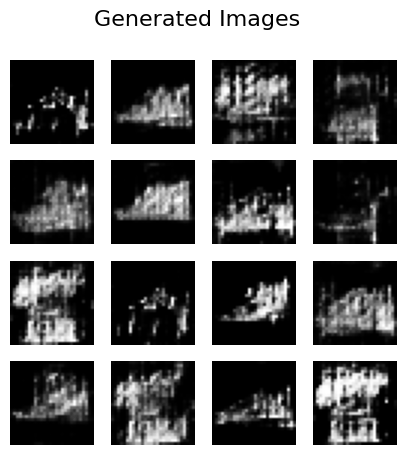

4/4 [==============================] - 0s 3ms/step
4501/10000 | D Loss: 0.07344177179038525 | G Loss: 7.287342548370361
4/4 [==============================] - 0s 3ms/step
4502/10000 | D Loss: 0.08338454365730286 | G Loss: 6.813765048980713
4/4 [==============================] - 0s 4ms/step
4503/10000 | D Loss: 0.026135927066206932 | G Loss: 5.966886520385742
4/4 [==============================] - 0s 3ms/step
4504/10000 | D Loss: 0.05163518153131008 | G Loss: 6.550302505493164
4/4 [==============================] - 0s 4ms/step
4505/10000 | D Loss: 0.058640770614147186 | G Loss: 6.030609130859375
4/4 [==============================] - 0s 5ms/step
4506/10000 | D Loss: 0.03588227368891239 | G Loss: 6.278531074523926
4/4 [==============================] - 0s 3ms/step
4507/10000 | D Loss: 0.12645263969898224 | G Loss: 6.515183448791504
4/4 [==============================] - 0s 4ms/step
4508/10000 | D Loss: 0.018909022212028503 | G Loss: 7.305200576782227
4/4 [==============================] 

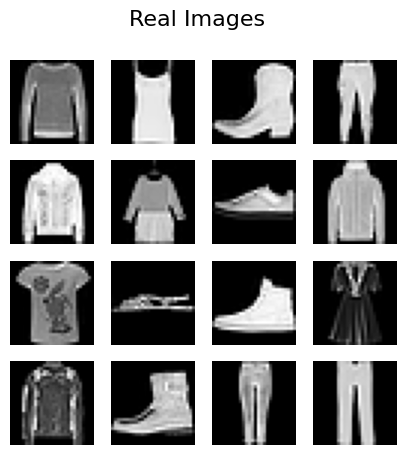

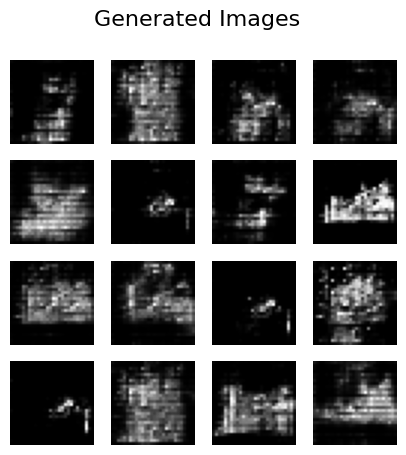

4/4 [==============================] - 0s 5ms/step
5001/10000 | D Loss: 0.01374652169761248 | G Loss: 10.90766716003418
4/4 [==============================] - 0s 3ms/step
5002/10000 | D Loss: 0.151105246914085 | G Loss: 8.20152759552002
4/4 [==============================] - 0s 3ms/step
5003/10000 | D Loss: 0.11404920741915703 | G Loss: 4.694157600402832
4/4 [==============================] - 0s 3ms/step
5004/10000 | D Loss: 0.1199975311756134 | G Loss: 6.022761344909668
4/4 [==============================] - 0s 4ms/step
5005/10000 | D Loss: 0.02172407228499651 | G Loss: 7.875002861022949
4/4 [==============================] - 0s 3ms/step
5006/10000 | D Loss: 0.006824875017628074 | G Loss: 7.114645481109619
4/4 [==============================] - 0s 3ms/step
5007/10000 | D Loss: 0.04912720434367657 | G Loss: 6.706132888793945
4/4 [==============================] - 0s 4ms/step
5008/10000 | D Loss: 0.05451781861484051 | G Loss: 7.676346778869629
4/4 [==============================] - 0s 3

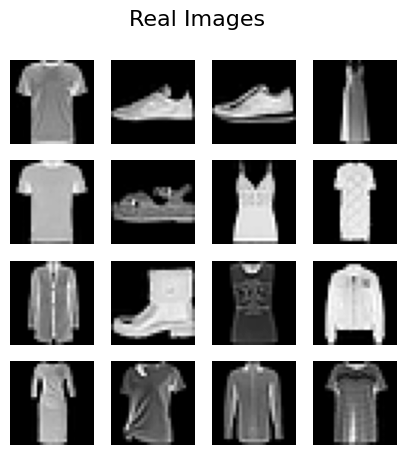

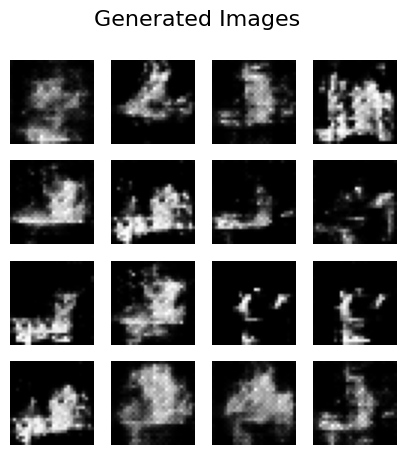

4/4 [==============================] - 0s 4ms/step
5501/10000 | D Loss: 0.1342296153306961 | G Loss: 5.82395601272583
4/4 [==============================] - 0s 4ms/step
5502/10000 | D Loss: 0.09770955890417099 | G Loss: 5.021635055541992
4/4 [==============================] - 0s 8ms/step
5503/10000 | D Loss: 0.06867906078696251 | G Loss: 5.037319660186768
4/4 [==============================] - 0s 3ms/step
5504/10000 | D Loss: 0.08145901188254356 | G Loss: 5.124309062957764
4/4 [==============================] - 0s 3ms/step
5505/10000 | D Loss: 0.09489686414599419 | G Loss: 5.905337333679199
4/4 [==============================] - 0s 3ms/step
5506/10000 | D Loss: 0.07161434553563595 | G Loss: 4.998236656188965
4/4 [==============================] - 0s 4ms/step
5507/10000 | D Loss: 0.11513075977563858 | G Loss: 3.249666213989258
4/4 [==============================] - 0s 4ms/step
5508/10000 | D Loss: 0.17946001142263412 | G Loss: 5.00462007522583
4/4 [==============================] - 0s 3

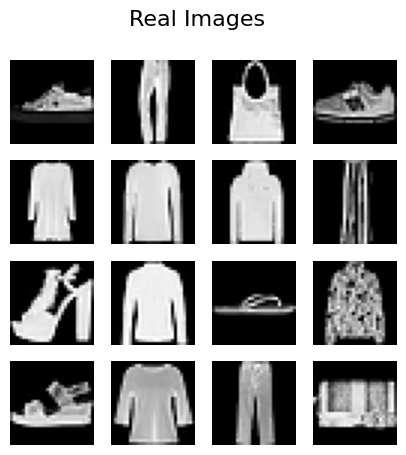

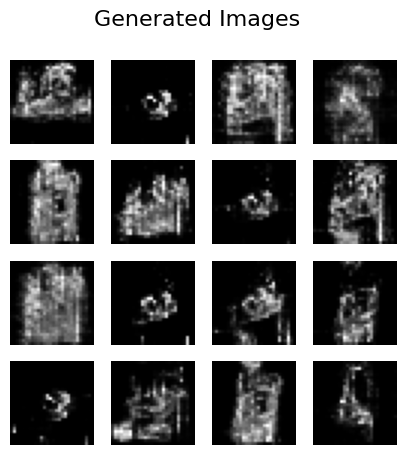

4/4 [==============================] - 0s 3ms/step
6001/10000 | D Loss: 0.06016640178859234 | G Loss: 6.878704071044922
4/4 [==============================] - 0s 4ms/step
6002/10000 | D Loss: 0.06250261142849922 | G Loss: 5.9654693603515625
4/4 [==============================] - 0s 3ms/step
6003/10000 | D Loss: 0.034044474363327026 | G Loss: 6.162671089172363
4/4 [==============================] - 0s 3ms/step
6004/10000 | D Loss: 0.06502610072493553 | G Loss: 6.435537815093994
4/4 [==============================] - 0s 3ms/step
6005/10000 | D Loss: 0.06939269416034222 | G Loss: 7.538738250732422
4/4 [==============================] - 0s 3ms/step
6006/10000 | D Loss: 0.030284478794783354 | G Loss: 7.969557762145996
4/4 [==============================] - 0s 3ms/step
6007/10000 | D Loss: 0.11313108447939157 | G Loss: 6.126301288604736
4/4 [==============================] - 0s 3ms/step
6008/10000 | D Loss: 0.10651751980185509 | G Loss: 4.966215133666992
4/4 [==============================] 

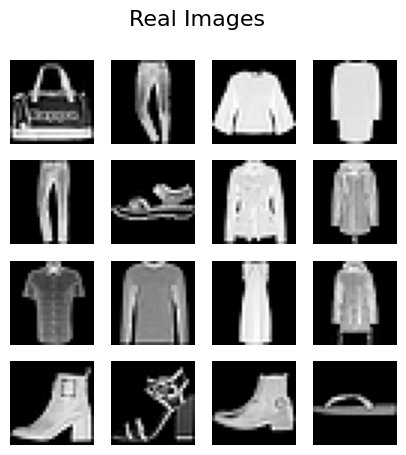

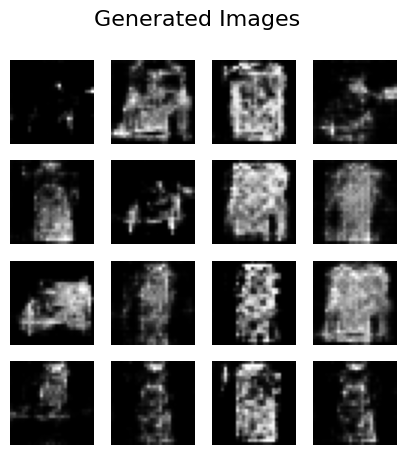

4/4 [==============================] - 0s 4ms/step
6501/10000 | D Loss: 0.2042353255674243 | G Loss: 6.809200763702393
4/4 [==============================] - 0s 3ms/step
6502/10000 | D Loss: 0.10201062262058258 | G Loss: 4.717968940734863
4/4 [==============================] - 0s 4ms/step
6503/10000 | D Loss: 0.0883765909820795 | G Loss: 4.340847015380859
4/4 [==============================] - 0s 3ms/step
6504/10000 | D Loss: 0.07900767028331757 | G Loss: 5.958611011505127
4/4 [==============================] - 0s 3ms/step
6505/10000 | D Loss: 0.06017296761274338 | G Loss: 7.627172470092773
4/4 [==============================] - 0s 3ms/step
6506/10000 | D Loss: 0.04501008568331599 | G Loss: 8.14914321899414
4/4 [==============================] - 0s 3ms/step
6507/10000 | D Loss: 0.09248240012675524 | G Loss: 7.412365913391113
4/4 [==============================] - 0s 3ms/step
6508/10000 | D Loss: 0.07085297349840403 | G Loss: 5.848424434661865
4/4 [==============================] - 0s 4

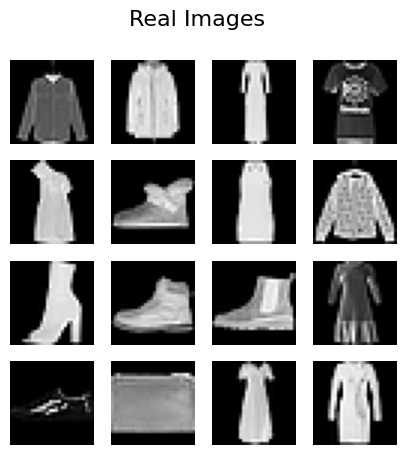

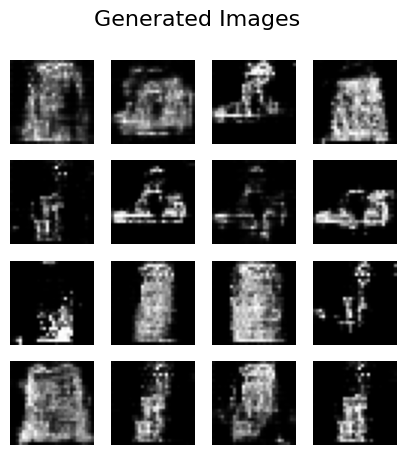

4/4 [==============================] - 0s 4ms/step
7001/10000 | D Loss: 0.23351397179067135 | G Loss: 5.571525573730469
4/4 [==============================] - 0s 3ms/step
7002/10000 | D Loss: 0.1430627480149269 | G Loss: 6.0431718826293945
4/4 [==============================] - 0s 3ms/step
7003/10000 | D Loss: 0.21705232560634613 | G Loss: 6.852017879486084
4/4 [==============================] - 0s 3ms/step
7004/10000 | D Loss: 0.11753358831629157 | G Loss: 8.359258651733398
4/4 [==============================] - 0s 3ms/step
7005/10000 | D Loss: 0.1437084637582302 | G Loss: 6.468430519104004
4/4 [==============================] - 0s 3ms/step
7006/10000 | D Loss: 0.11912374943494797 | G Loss: 5.732405662536621
4/4 [==============================] - 0s 3ms/step
7007/10000 | D Loss: 0.11229364201426506 | G Loss: 7.454410552978516
4/4 [==============================] - 0s 3ms/step
7008/10000 | D Loss: 0.08477277681231499 | G Loss: 9.69286060333252
4/4 [==============================] - 0s 

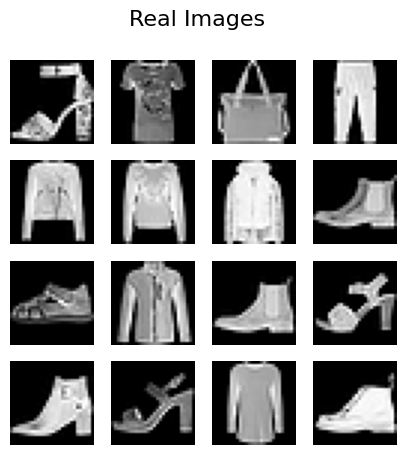

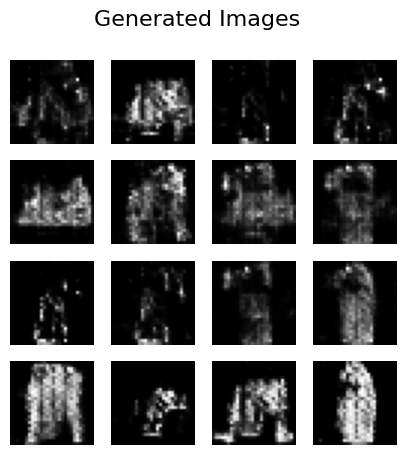

4/4 [==============================] - 0s 3ms/step
7501/10000 | D Loss: 0.06415619375184178 | G Loss: 7.290195465087891
4/4 [==============================] - 0s 3ms/step
7502/10000 | D Loss: 0.08041532337665558 | G Loss: 5.687292098999023
4/4 [==============================] - 0s 3ms/step
7503/10000 | D Loss: 0.13548967987298965 | G Loss: 5.4085235595703125
4/4 [==============================] - 0s 7ms/step
7504/10000 | D Loss: 0.1257697008550167 | G Loss: 4.910419464111328
4/4 [==============================] - 0s 3ms/step
7505/10000 | D Loss: 0.06408731080591679 | G Loss: 6.747796058654785
4/4 [==============================] - 0s 4ms/step
7506/10000 | D Loss: 0.05942312302067876 | G Loss: 8.002401351928711
4/4 [==============================] - 0s 4ms/step
7507/10000 | D Loss: 0.04757888242602348 | G Loss: 8.073077201843262
4/4 [==============================] - 0s 4ms/step
7508/10000 | D Loss: 0.12247872492298484 | G Loss: 7.267626762390137
4/4 [==============================] - 0

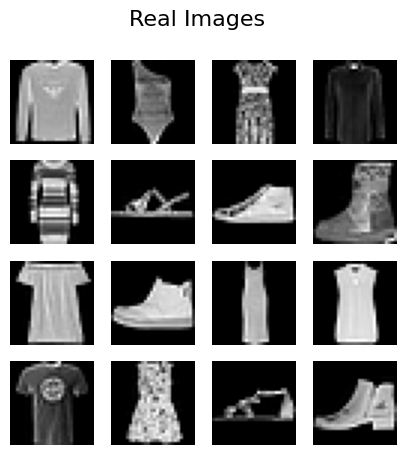

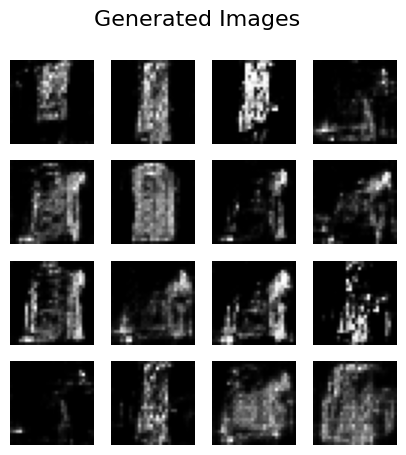

4/4 [==============================] - 0s 4ms/step
8001/10000 | D Loss: 0.06457723304629326 | G Loss: 5.157930374145508
4/4 [==============================] - 0s 3ms/step
8002/10000 | D Loss: 0.07825395092368126 | G Loss: 6.5925445556640625
4/4 [==============================] - 0s 3ms/step
8003/10000 | D Loss: 0.0409016078338027 | G Loss: 7.20517110824585
4/4 [==============================] - 0s 3ms/step
8004/10000 | D Loss: 0.10758742317557335 | G Loss: 6.708063125610352
4/4 [==============================] - 0s 3ms/step
8005/10000 | D Loss: 0.0795640479773283 | G Loss: 5.499092102050781
4/4 [==============================] - 0s 3ms/step
8006/10000 | D Loss: 0.04786204174160957 | G Loss: 4.683319091796875
4/4 [==============================] - 0s 4ms/step
8007/10000 | D Loss: 0.04221583530306816 | G Loss: 5.737747669219971
4/4 [==============================] - 0s 4ms/step
8008/10000 | D Loss: 0.01898542046546936 | G Loss: 7.109479904174805
4/4 [==============================] - 0s 

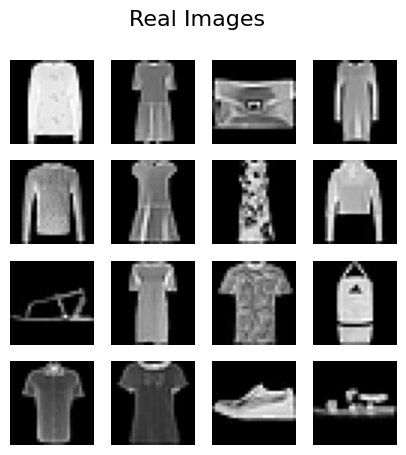

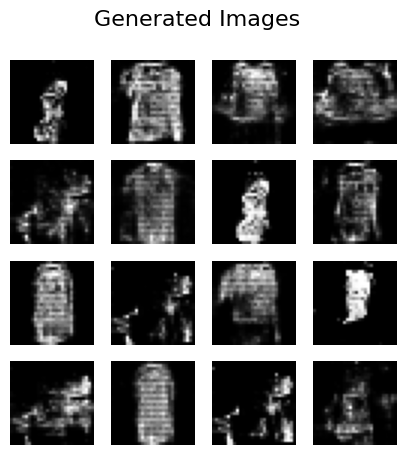

4/4 [==============================] - 0s 4ms/step
8501/10000 | D Loss: 0.06386841484345496 | G Loss: 7.563549995422363
4/4 [==============================] - 0s 5ms/step
8502/10000 | D Loss: 0.017236155923455954 | G Loss: 6.632358074188232
4/4 [==============================] - 0s 3ms/step
8503/10000 | D Loss: 0.07950797118246555 | G Loss: 6.033741474151611
4/4 [==============================] - 0s 3ms/step
8504/10000 | D Loss: 0.011772150173783302 | G Loss: 7.386621952056885
4/4 [==============================] - 0s 3ms/step
8505/10000 | D Loss: 0.029654321260750294 | G Loss: 7.729697227478027
4/4 [==============================] - 0s 5ms/step
8506/10000 | D Loss: 0.025146703235805035 | G Loss: 7.437734603881836
4/4 [==============================] - 0s 3ms/step
8507/10000 | D Loss: 0.036795749329030514 | G Loss: 6.64966344833374
4/4 [==============================] - 0s 4ms/step
8508/10000 | D Loss: 0.029520891373977065 | G Loss: 6.454660415649414
4/4 [==============================

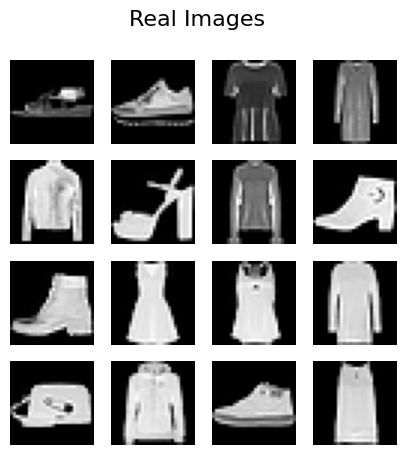

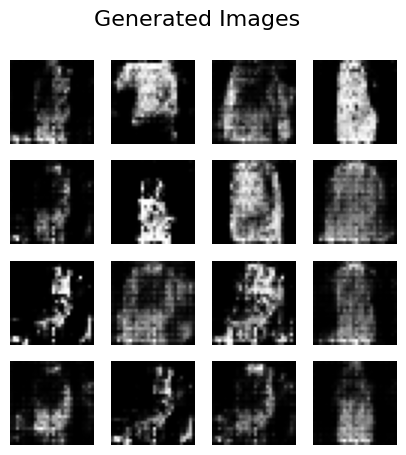

4/4 [==============================] - 0s 4ms/step
9001/10000 | D Loss: 0.03264936991035938 | G Loss: 7.8578104972839355
4/4 [==============================] - 0s 3ms/step
9002/10000 | D Loss: 0.08642005175352097 | G Loss: 7.297565460205078
4/4 [==============================] - 0s 4ms/step
9003/10000 | D Loss: 0.11983123049139977 | G Loss: 6.895225524902344
4/4 [==============================] - 0s 4ms/step
9004/10000 | D Loss: 0.19310813397169113 | G Loss: 6.096322059631348
4/4 [==============================] - 0s 3ms/step
9005/10000 | D Loss: 0.1510223224759102 | G Loss: 5.718591213226318
4/4 [==============================] - 0s 5ms/step
9006/10000 | D Loss: 0.1999262534081936 | G Loss: 5.593059539794922
4/4 [==============================] - 0s 3ms/step
9007/10000 | D Loss: 0.19194725155830383 | G Loss: 5.643610954284668
4/4 [==============================] - 0s 3ms/step
9008/10000 | D Loss: 0.07198047824203968 | G Loss: 6.438389778137207
4/4 [==============================] - 0s

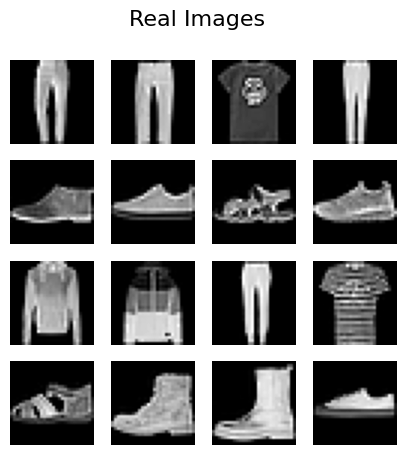

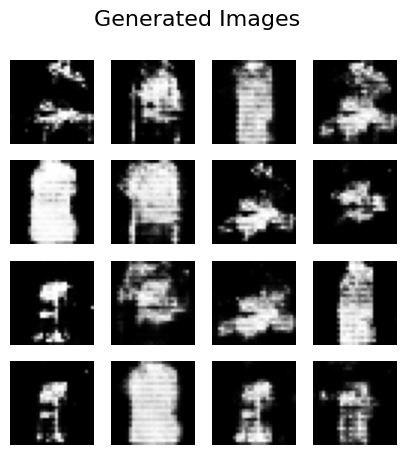

4/4 [==============================] - 0s 4ms/step
9501/10000 | D Loss: 0.030388306826353073 | G Loss: 5.308328628540039
4/4 [==============================] - 0s 3ms/step
9502/10000 | D Loss: 0.07375315902754664 | G Loss: 5.8441691398620605
4/4 [==============================] - 0s 3ms/step
9503/10000 | D Loss: 0.018742126994766295 | G Loss: 9.453155517578125
4/4 [==============================] - 0s 3ms/step
9504/10000 | D Loss: 0.006503063021227717 | G Loss: 11.847708702087402
4/4 [==============================] - 0s 3ms/step
9505/10000 | D Loss: 0.03953221661504358 | G Loss: 12.118345260620117
4/4 [==============================] - 0s 4ms/step
9506/10000 | D Loss: 0.032547316688578576 | G Loss: 11.891000747680664
4/4 [==============================] - 0s 3ms/step
9507/10000 | D Loss: 0.05854031792841852 | G Loss: 10.949068069458008
4/4 [==============================] - 0s 4ms/step
9508/10000 | D Loss: 0.044974297285079956 | G Loss: 7.775549411773682
4/4 [=========================

In [ ]:
# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the generator
generator = build_generator()

# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Train the GAN
train_gan(generator, discriminator, gan, x_train, epochs=10000, batch_size=128, sample_interval=500)


1/1 [==============================] - 0s 19ms/step


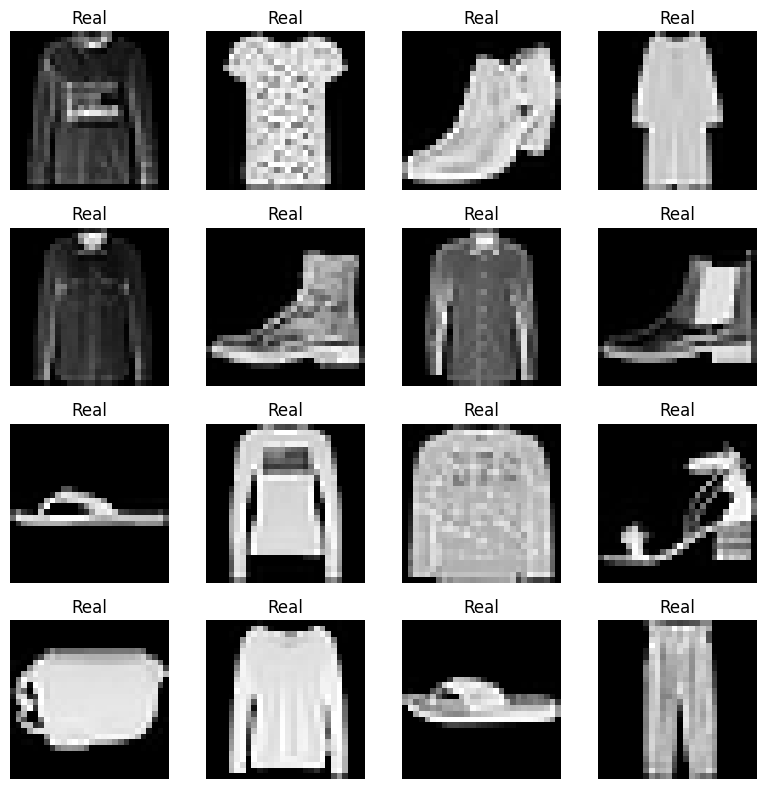

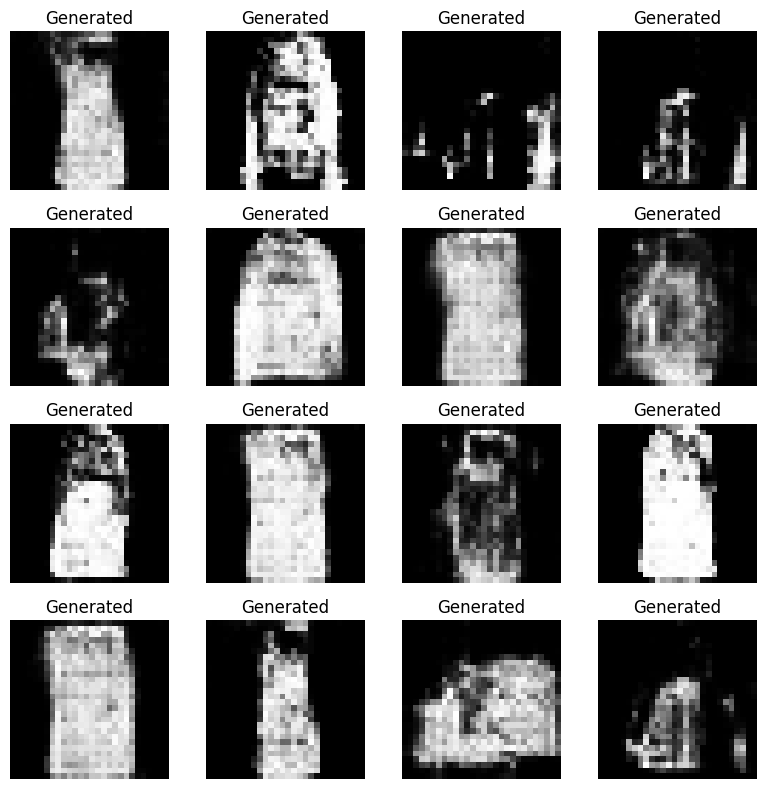

In [ ]:
def show_latest_real_and_generated_images(generator, x_train, examples=16, dim=(4, 4), figsize=(8, 8)):
    """
    Displays the latest batch of real and generated images side by side.

    Args:
        generator: Trained generator model.
        x_train: Original dataset for real images.
        examples: Number of examples to display.
        dim: Dimensions for subplot grid.
        figsize: Figure size for the plot.
    """
    # Select a random batch of real images
    idx = np.random.randint(0, x_train.shape[0], examples)
    real_images = x_train[idx]
    real_images = (real_images + 1) / 2.0  # Rescale to [0, 1]

    # Generate images using random noise
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) / 2.0  # Rescale to [0, 1]

    # Plot real images
    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            axs[i, j].imshow(real_images[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            axs[i, j].set_title("Real")
            cnt += 1
    plt.tight_layout()
    plt.show()

    # Plot generated images
    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            axs[i, j].imshow(generated_images[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            axs[i, j].set_title("Generated")
            cnt += 1
    plt.tight_layout()
    plt.show()

# Call the function after training the GAN
show_latest_real_and_generated_images(generator, x_train, examples=16, dim=(4, 4), figsize=(8, 8))


In [ ]:
def evaluate_discriminator(discriminator, generator, x_train, batch_size=128):
    """
    Evaluates and prints the accuracy of the discriminator on real and generated images.

    Args:
        discriminator: Trained discriminator model.
        generator: Trained generator model.
        x_train: Dataset containing real images.
        batch_size: Number of samples for evaluation.
    """
    # Prepare real images
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]
    real_labels = np.ones((batch_size, 1))  # Label real images as 1

    # Generate fake images
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_images = generator.predict(noise)
    fake_labels = np.zeros((batch_size, 1))  # Label fake images as 0

    # Evaluate discriminator on real images
    real_loss, real_accuracy = discriminator.evaluate(real_images, real_labels, verbose=0)

    # Evaluate discriminator on fake images
    fake_loss, fake_accuracy = discriminator.evaluate(fake_images, fake_labels, verbose=0)

    # Print results
    print(f"Discriminator Accuracy on Real Images: {real_accuracy * 100:.2f}%")
    print(f"Discriminator Accuracy on Generated Images: {fake_accuracy * 100:.2f}%")

# Call the function after training the GAN
evaluate_discriminator(discriminator, generator, x_train)


4/4 [==============================] - 0s 2ms/step
Discriminator Accuracy on Real Images: 98.44%
Discriminator Accuracy on Generated Images: 100.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Function to reduce noise in generated images
def reduce_noise(images, sigma=1):
    """
    Applies Gaussian blur to reduce noise in the images.

    Args:
        images: Numpy array of images to denoise.
        sigma: Standard deviation for Gaussian kernel.

    Returns:
        Denoised images as a Numpy array.
    """
    denoised_images = np.array([gaussian_filter(img, sigma=sigma) for img in images])
    return denoised_images

# Function to display real and generated images
def show_real_and_generated_images(generator, x_train, examples=16, dim=(4, 4), figsize=(8, 8), denoise=False):
    """
    Displays real and generated images side by side with optional denoising for generated images.

    Args:
        generator: Trained generator model.
        x_train: Original dataset for real images.
        examples: Number of examples to display.
        dim: Dimensions for subplot grid.
        figsize: Figure size for the plot.
        denoise: Whether to apply noise reduction to generated images.
    """
    # Select a random batch of real images
    idx = np.random.randint(0, x_train.shape[0], examples)
    real_images = x_train[idx]
    real_images = (real_images + 1) / 2.0  # Rescale to [0, 1]

    # Generate images using random noise
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) / 2.0  # Rescale to [0, 1]

    # Ensure generated images have a channel dimension if missing
    if generated_images.ndim == 3:
        generated_images = np.expand_dims(generated_images, axis=-1)

    # Apply noise reduction if denoise=True
    if denoise:
        generated_images = reduce_noise(generated_images)

    # Plot real and generated images
    fig, axs = plt.subplots(dim[0], dim[1] * 2, figsize=(figsize[0] * 2, figsize[1]))
    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1] * 2):
            if j % 2 == 0:  # Real images
                axs[i, j].imshow(real_images[cnt // 2, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                axs[i, j].set_title("Real")
            else:  # Generated images
                axs[i, j].imshow(generated_images[cnt // 2, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                axs[i, j].set_title("Generated")
                cnt += 1
    plt.tight_layout()
    plt.show()

# Example usage after training the GAN
# Assume `generator` is your trained generator model and `x_train` contains your dataset
# show_real_and_generated_images(generator, x_train, examples=16, dim=(4, 4), figsize=(8, 8), denoise=True)


1/1 [==============================] - 0s 25ms/step


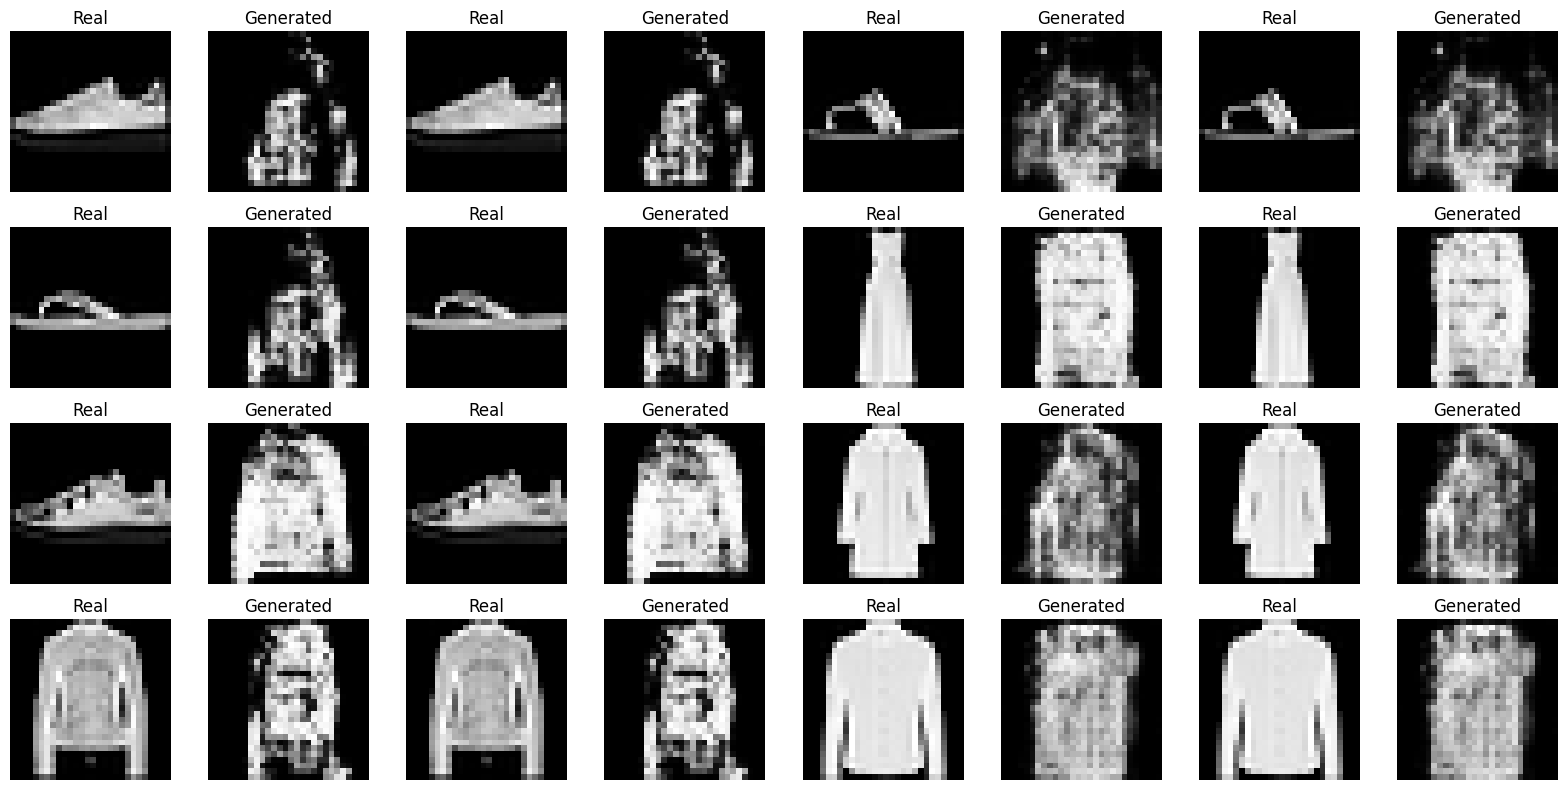

In [ ]:
show_real_and_generated_images(generator, x_train, examples=16, dim=(4, 4), figsize=(8, 8), denoise=False)

1/1 [==============================] - 0s 21ms/step


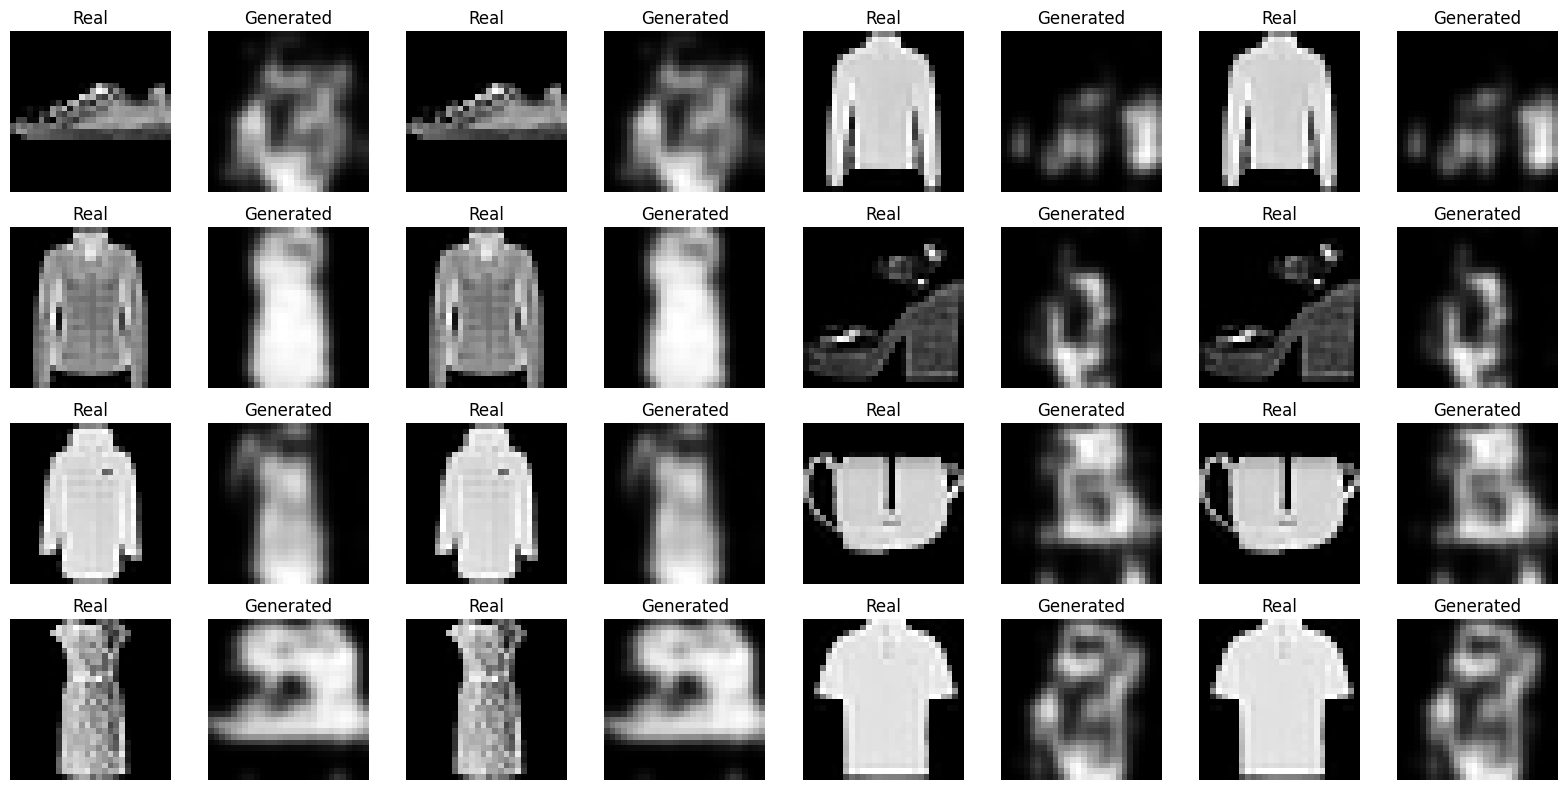

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Function to reduce noise in generated images
def reduce_noise(images, sigma=1):
    """
    Applies Gaussian blur to reduce noise in the images.

    Args:
        images: Numpy array of images to denoise.
        sigma: Standard deviation for Gaussian kernel.

    Returns:
        Denoised images as a Numpy array.
    """
    denoised_images = np.array([gaussian_filter(img, sigma=sigma) for img in images])
    return denoised_images

# Function to display real and generated images
def show_real_and_generated_images(generator, x_train, examples=16, dim=(4, 4), figsize=(8, 8), denoise=False, sigma=1):
    """
    Displays real and generated images side by side with optional denoising for generated images.

    Args:
        generator: Trained generator model.
        x_train: Original dataset for real images.
        examples: Number of examples to display.
        dim: Dimensions for subplot grid.
        figsize: Figure size for the plot.
        denoise: Whether to apply noise reduction to generated images.
        sigma: Standard deviation for Gaussian kernel (used in denoising).
    """
    # Select a random batch of real images
    idx = np.random.randint(0, x_train.shape[0], examples)
    real_images = x_train[idx]
    real_images = (real_images + 1) / 2.0  # Rescale to [0, 1]

    # Generate images using random noise
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) / 2.0  # Rescale to [0, 1]

    # Ensure generated images have a channel dimension if missing
    if generated_images.ndim == 3:
        generated_images = np.expand_dims(generated_images, axis=-1)

    # Apply noise reduction if denoise=True
    if denoise:
        generated_images = reduce_noise(generated_images, sigma=sigma)

    # Plot real and generated images
    fig, axs = plt.subplots(dim[0], dim[1] * 2, figsize=(figsize[0] * 2, figsize[1]))
    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1] * 2):
            if j % 2 == 0:  # Real images
                axs[i, j].imshow(real_images[cnt // 2, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                axs[i, j].set_title("Real")
            else:  # Generated images
                axs[i, j].imshow(generated_images[cnt // 2, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                axs[i, j].set_title("Generated")
                cnt += 1
    plt.tight_layout()
    plt.show()

# Example usage after training the GAN
# Assume `generator` is your trained generator model and `x_train` contains your dataset
show_real_and_generated_images(generator, x_train, examples=16, dim=(4, 4), figsize=(8, 8), denoise=True, sigma=1)


1/1 [==============================] - 0s 20ms/step


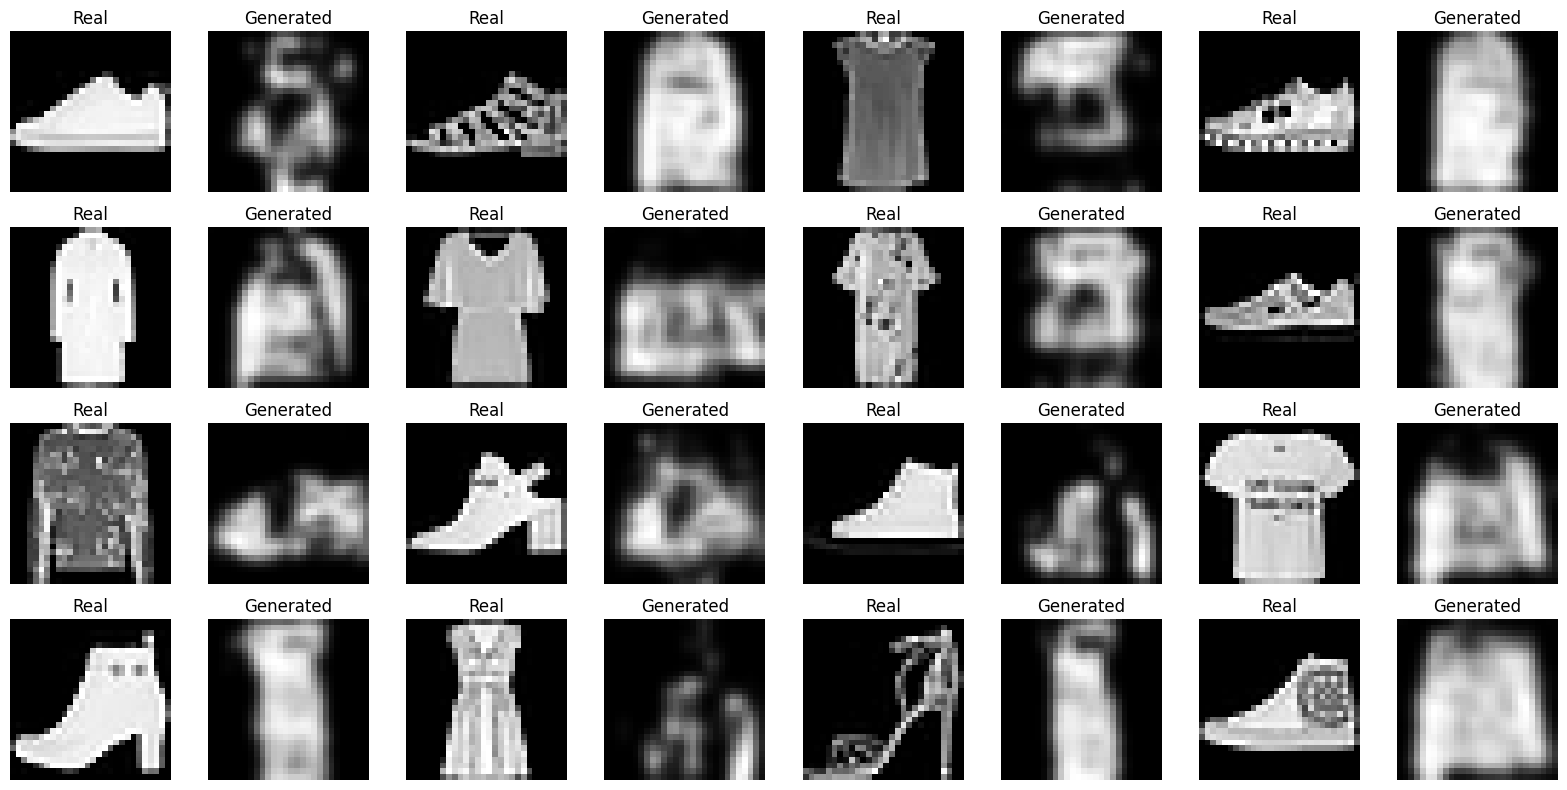

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Function to reduce noise in generated images
def reduce_noise(images, sigma=1):
    """
    Applies Gaussian blur to reduce noise in the images.

    Args:
        images: Numpy array of images to denoise.
        sigma: Standard deviation for Gaussian kernel.

    Returns:
        Denoised images as a Numpy array.
    """
    denoised_images = np.array([gaussian_filter(img, sigma=sigma) for img in images])
    return denoised_images

# Function to display real and generated images
def show_real_and_generated_images(generator, x_train, examples=16, dim=(4, 4), figsize=(8, 8), denoise=False, sigma=1):
    """
    Displays real and generated images side by side with optional denoising for generated images.

    Args:
        generator: Trained generator model.
        x_train: Original dataset for real images.
        examples: Number of examples to display.
        dim: Dimensions for subplot grid.
        figsize: Figure size for the plot.
        denoise: Whether to apply noise reduction to generated images.
        sigma: Standard deviation for Gaussian kernel (used in denoising).
    """
    # Select a random batch of real images
    idx = np.random.randint(0, x_train.shape[0], examples)
    real_images = x_train[idx]
    real_images = (real_images + 1) / 2.0  # Rescale to [0, 1]

    # Generate images using random noise
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) / 2.0  # Rescale to [0, 1]

    # Ensure generated images have a channel dimension if missing
    if generated_images.ndim == 3:
        generated_images = np.expand_dims(generated_images, axis=-1)

    # Apply noise reduction if denoise=True
    if denoise:
        generated_images = reduce_noise(generated_images, sigma=sigma)

    # Plot real and generated images
    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    cnt = 0
    for i in range(dim[0]):
        for j in range(0, dim[1], 2):
            axs[i, j].imshow(real_images[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            axs[i, j].set_title("Real")
            axs[i, j+1].imshow(generated_images[cnt, :, :, 0], cmap='gray')
            axs[i, j+1].axis('off')
            axs[i, j+1].set_title("Generated")
            cnt += 1
    plt.tight_layout()
    plt.show()

# Example usage after training the GAN
# Assume `generator` is your trained generator model and `x_train` contains your dataset
show_real_and_generated_images(generator, x_train, examples=16, dim=(4, 8), figsize=(16, 8), denoise=True, sigma=1)


1/1 [==============================] - 0s 24ms/step


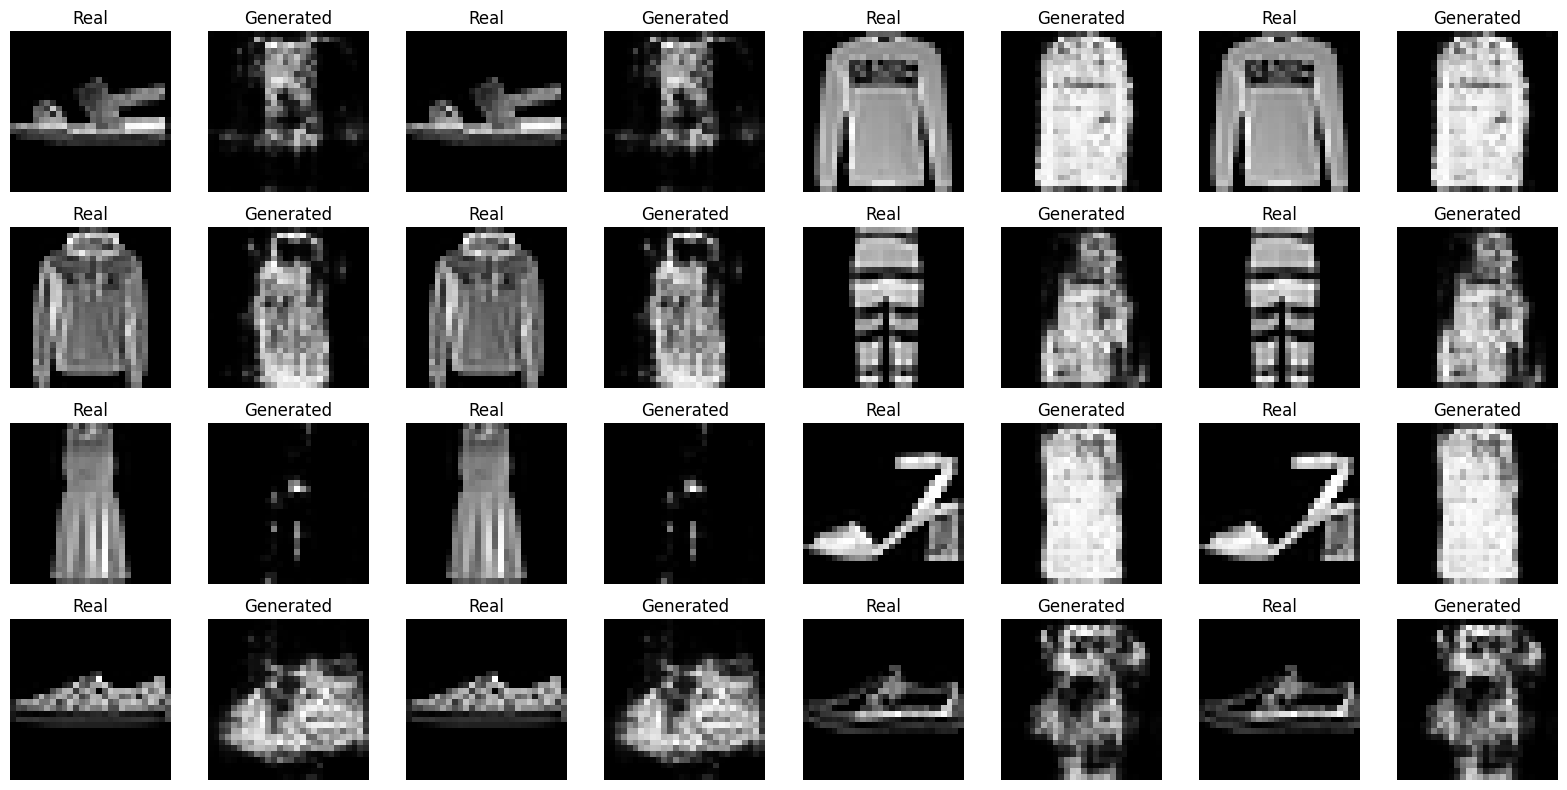

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display real and generated images
def show_real_and_generated_images(generator, x_train, examples=16, dim=(4, 4), figsize=(8, 8)):
    """
    Displays real and generated images side by side.

    Args:
        generator: Trained generator model.
        x_train: Original dataset for real images.
        examples: Number of examples to display.
        dim: Dimensions for subplot grid.
        figsize: Figure size for the plot.
    """
    # Select a random batch of real images
    idx = np.random.randint(0, x_train.shape[0], examples)
    real_images = x_train[idx]
    real_images = (real_images + 1) / 2.0  # Rescale to [0, 1]

    # Generate images using random noise
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) / 2.0  # Rescale to [0, 1]

    # Ensure generated images have a channel dimension if missing
    if generated_images.ndim == 3:
        generated_images = np.expand_dims(generated_images, axis=-1)

    # Plot real and generated images
    fig, axs = plt.subplots(dim[0], dim[1] * 2, figsize=(figsize[0] * 2, figsize[1]))
    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1] * 2):
            if j % 2 == 0:  # Real images
                axs[i, j].imshow(real_images[cnt // 2, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                axs[i, j].set_title("Real")
            else:  # Generated images
                axs[i, j].imshow(generated_images[cnt // 2, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                axs[i, j].set_title("Generated")
                cnt += 1
    plt.tight_layout()
    plt.show()

# Example usage after training the GAN
# Assume `generator` is your trained generator model and `x_train` contains your dataset
show_real_and_generated_images(generator, x_train, examples=16, dim=(4, 4), figsize=(8, 8))


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19

# Define perceptual loss function
def perceptual_loss(y_true, y_pred):
    vgg = VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False

    # Use VGG features to extract high-level features of both real and generated images
    features_true = vgg(y_true)
    features_pred = vgg(y_pred)

    # Calculate the L2 distance between features
    return tf.reduce_mean(tf.square(features_true - features_pred))

# Then, during training, replace your traditional loss with perceptual loss
# This can be added to your generator and discriminator training losses
